<a href="https://colab.research.google.com/github/LxMera/Deep-Learning---denoising-rs-fMRI/blob/master/Training_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import os.path as path
if path.exists('Data'):   
    print ('The folder alredy exists')
else:
    !wget -nc https://www.dropbox.com/s/ufwmggstfj0xr8c/DatosXYZ.mat?dl=1
    !wget -nc https://www.dropbox.com/s/9vfa4ehuhu76jjl/Data.zip?dl=1
    !unzip Data.zip?dl=1 | awk 'BEGIN { ORS = "" } { print "|" }'
    !rm -r Data.zip?dl=1
    !mv DatosXYZ.mat?dl=1 Data/DatosXYZ.mat

The folder alredy exists


In [0]:
import numpy as np
import scipy.io

### Shape

In [13]:
mat = scipy.io.loadmat('Data/DatosT.mat')
etique = scipy.io.loadmat('Data/LabelFix.mat')
Datos=mat['Datos_C']
Etiq=np.transpose(etique['series'])[:,0]

print (np.shape(Datos))
print (np.shape(Etiq))

(22877, 27)
(22877,)


In [0]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from IPython.display import clear_output

### training and test data

In [15]:
por=int(np.shape(Datos)[0]*0.8)

X_test=Datos[por:]
X_train=Datos[:por]

y_test=Etiq[por:]
y_train=Etiq[:por]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18301, 27)
(18301,)
(4576, 27)
(4576,)


[ 8.01010634e-03  1.13630153e-02  2.65592509e-02  6.93982153e-02
  1.26223072e-01  1.26223072e-01  1.26223072e-01  1.26223072e-01
  1.42954413e+00  1.65319955e+00  7.43776799e-12  1.58884830e-01
 -7.29122609e+03  2.76817848e+00  1.08809645e+00  8.00862936e+00
  1.63375438e-01  1.25359820e-02  2.09263393e-03  1.43240533e+03
  6.26133380e-02  2.09263393e-03  1.79566074e+01  5.14431286e+00
  2.41240707e+00  0.00000000e+00  3.43422985e-03]


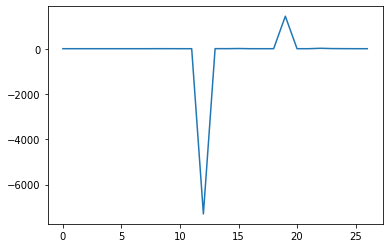

In [16]:
ind = np.random.permutation(X_train.shape[0])
plt.plot(X_train[ind[0],:]);
print(X_train[ind[0]])

In [18]:
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler

#Input dimensions
input_dim = X_train.shape[1]

#Standardization
scaler = StandardScaler()
X_trainNx = scaler.fit_transform(X_train)
X_testNx = scaler.fit_transform(X_test)
DatosN=scaler.fit_transform(Datos)

y_trainOHE = np_utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

print(y_trainOHE[ind[0],:])

[1. 0.]


[-2.15405197 -2.75794284 -1.71723228 -0.52933085 -1.51316571 -1.51316571
 -1.51316571 -1.51316571  2.65869612 -0.19298148  0.36707571  1.9892261
 -3.67493986 -0.05943436 -1.29110532  0.19113036 -2.0506434  -1.92234777
 -1.4190913   0.03472681  0.03473651 -0.51978386 -1.92234777 -1.59809799
 -1.47672096  0.         -2.02447312]


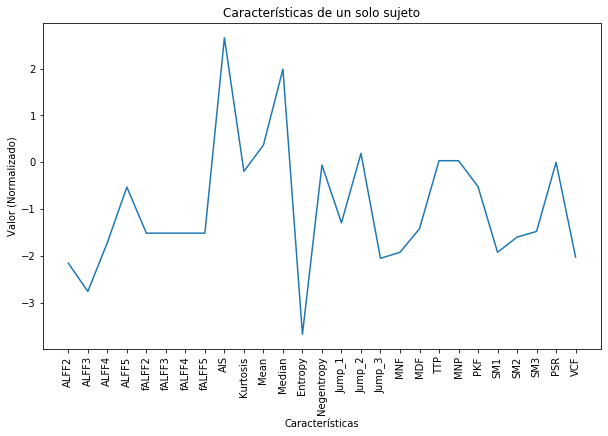

In [19]:
plt.figure(figsize=(10,6))
plt.plot(X_trainNx[ind[0],:]);
plt.title('Características de un solo sujeto')
plt.xlabel('Características')
pos=np.arange(27)
lab=['ALFF2','ALFF3','ALFF4','ALFF5','fALFF2','fALFF3','fALFF4','fALFF5','AIS','Kurtosis','Mean','Median','Entropy','Negentropy','Jump_1','Jump_2','Jump_3','MNF','MDF','TTP','MNP','PKF','SM1','SM2','SM3','PSR','VCF']
plt.xticks(pos,lab, rotation='vertical')
plt.ylabel('Valor (Normalizado)')
print(X_trainNx[ind[0]])

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from sklearn.decomposition import FastICA, PCA

In [21]:
bat=500
reg=0.4
epo=100
pre1=[]
pre2=[]
pre3=[]
pre4=[]
  
for co in range(27,10,-1):
  pca = PCA(n_components=co)
  X_trainN = pca.fit_transform(X_trainNx)
  X_testN = pca.fit_transform(X_testNx)
  
  input_dim = X_testN.shape[1]
  print (input_dim)
  print (nb_classes)
  
  #first
  model = Sequential()
  model.add(Dense(13, input_dim=input_dim))
  model.add(Activation('tanh'))
  model.add(Dropout(reg))
  model.add(Dense(6))
  model.add(Activation('tanh'))
  model.add(Dropout(reg))
  model.add(Dense(nb_classes, activation='softmax'))
  
  #second
  model2 = Sequential()
  model2.add(Dense(8, input_dim=input_dim))
  model2.add(Activation('tanh'))
  model2.add(Dropout(reg))
  model2.add(Dense(4))
  model2.add(Activation('tanh'))
  model2.add(Dropout(reg))
  model2.add(Dense(nb_classes, activation='softmax'))
  
  #third
  model3 = Sequential()
  model3.add(Dense(16, input_dim=input_dim))
  model3.add(Activation('tanh'))
  model3.add(Dropout(reg))
  model3.add(Dense(8))
  model3.add(Activation('tanh'))
  model3.add(Dropout(reg))
  model3.add(Dense(4))
  model3.add(Activation('tanh'))
  model3.add(Dropout(reg))
  model3.add(Dense(nb_classes, activation='softmax'))

  #Fourth
  model4 = Sequential()
  model4.add(Dense(8, input_dim=input_dim))
  model4.add(Activation('tanh'))
  model4.add(Dropout(reg))
  model4.add(Dense(nb_classes, activation='softmax'))

  #model parameters
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  model4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  
  print("Training model 1...")
  history1x=model.fit(X_trainN, y_trainOHE, epochs=epo, batch_size=bat, validation_split=0.1, verbose=0)
  
  print("Training model 2...")
  history2x=model2.fit(X_trainN, y_trainOHE, epochs=epo, batch_size=bat, validation_split=0.1, verbose=0)
  
  print("Training model 3...")
  history3x=model3.fit(X_trainN, y_trainOHE, epochs=epo, batch_size=bat, validation_split=0.1, verbose=0)
  
  print("Training model 4...")
  history4x=model4.fit(X_trainN, y_trainOHE, epochs=epo, batch_size=bat, validation_split=0.1, verbose=0)
  
  
  #clear_output(wait=True)  
  preds = model.predict_classes(X_testN, verbose=0)
  Accuracy = np.mean(preds == y_test)
  pre1.append(Accuracy)  
  print('Accuracy = ', Accuracy*100, '%')
    
  preds2 = model2.predict_classes(X_testN, verbose=0)
  Accuracy2 = np.mean(preds2 == y_test)
  pre2.append(Accuracy2)
  print('Accuracy = ', Accuracy2*100, '%')  
  
  preds3 = model3.predict_classes(X_testN, verbose=0)
  Accuracy3 = np.mean(preds3 == y_test)
  pre3.append(Accuracy3)
  print('Accuracy = ', Accuracy3*100, '%')
  
  preds4 = model4.predict_classes(X_testN, verbose=0)
  Accuracy4 = np.mean(preds4 == y_test)
  pre4.append(Accuracy4)
  print('Accuracy = ', Accuracy4*100, '%')
  
  del model
  del model2
  del model3
  del model4
  del pca

27
2
Training model 1...
Training model 2...
Training model 3...
Training model 4...
Accuracy =  95.08304195804196 %
Accuracy =  94.88636363636364 %
Accuracy =  93.75 %
Accuracy =  93.92482517482517 %
26
2
Training model 1...
Training model 2...
Training model 3...
Training model 4...
Accuracy =  94.93006993006993 %
Accuracy =  95.25786713286713 %
Accuracy =  94.90821678321679 %
Accuracy =  93.81555944055944 %
25
2
Training model 1...
Training model 2...
Training model 3...
Training model 4...
Accuracy =  95.06118881118881 %
Accuracy =  95.12674825174825 %
Accuracy =  93.66258741258741 %
Accuracy =  93.50961538461539 %
24
2
Training model 1...
Training model 2...
Training model 3...
Training model 4...
Accuracy =  94.27447552447552 %
Accuracy =  93.33479020979021 %
Accuracy =  93.4222027972028 %
Accuracy =  93.72814685314685 %
23
2
Training model 1...
Training model 2...
Training model 3...
Training model 4...
Accuracy =  93.3784965034965 %
Accuracy =  94.6896853146853 %
Accuracy =  93

(0.8, 1)

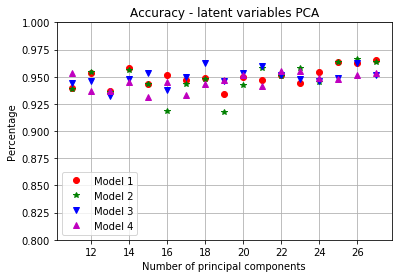

In [22]:
comp=np.arange(11,28,1)
plt.plot(comp,pre1[::-1],'or')
plt.plot(comp,pre2[::-1],'*g')
plt.plot(comp,pre3[::-1],'vb')
plt.plot(comp,pre4[::-1],'^m')
plt.title('Accuracy - latent variables PCA')
plt.ylabel('Percentage')
plt.xlabel('Number of principal components')
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4'], loc='upper rigth')
plt.grid()
plt.ylim([0.8, 1])